### NYC_School_Demographics_and_Accountability_Analysis

In [1]:
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt
import numpy as np
import requests

In [2]:
f = requests.get(r'https://data.cityofnewyork.us/api/views/ihfw-zy9j/rows.json')
data = json.loads(f.text)

In [3]:
data.keys()

dict_keys(['meta', 'data'])

### Meta

In [4]:
data['meta'].keys()

dict_keys(['view'])

In [5]:
data['meta']['view'].keys()

dict_keys(['id', 'name', 'assetType', 'attribution', 'attributionLink', 'averageRating', 'category', 'createdAt', 'description', 'displayType', 'downloadCount', 'hideFromCatalog', 'hideFromDataJson', 'indexUpdatedAt', 'newBackend', 'numberOfComments', 'oid', 'provenance', 'publicationAppendEnabled', 'publicationDate', 'publicationGroup', 'publicationStage', 'rowClass', 'rowsUpdatedAt', 'rowsUpdatedBy', 'tableId', 'totalTimesRated', 'viewCount', 'viewLastModified', 'viewType', 'approvals', 'clientContext', 'columns', 'grants', 'metadata', 'owner', 'query', 'rights', 'tableAuthor', 'tags', 'flags'])

In [6]:
data['meta']['view']['columns'][0]

{'id': -1,
 'name': 'sid',
 'dataTypeName': 'meta_data',
 'fieldName': ':sid',
 'position': 0,
 'renderTypeName': 'meta_data',
 'format': {},
 'flags': ['hidden']}

In [7]:
len(data['meta']['view']['columns'])

46

In [8]:
#Extracting Column Name
column_name = []
for i in data['meta']['view']['columns']:
    column_name.append(i['name'])
print(column_name)

['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at', 'updated_meta', 'meta', 'DBN', 'Name', 'schoolyear', 'fl_percent', 'frl_percent', 'total_enrollment', 'prek', 'k', 'grade1', 'grade2', 'grade3', 'grade4', 'grade5', 'grade6', 'grade7', 'grade8', 'grade9', 'grade10', 'grade11', 'grade12', 'ell_num', 'ell_percent', 'sped_num', 'sped_percent', 'ctt_num', 'selfcontained_num', 'asian_num', 'asian_per', 'black_num', 'black_per', 'hispanic_num', 'hispanic_per', 'white_num', 'white_per', 'male_num', 'male_per', 'female_num', 'female_per']


### Data

In [9]:
len(data['data'])

10075

In [10]:
print(data['data'][0])

['row-h6zp~rx75.iwiv', '00000000-0000-0000-C205-81EF0C7F0969', 0, 1425758466, None, 1425758466, None, '{ }', '01M015', 'P.S. 015 ROBERTO CLEMENTE', '20052006', '89.4', None, '281', '15', '36', '40', '33', '38', '52', '29', '38', None, None, None, None, None, None, '36', '12.8', '57', '20.3', '25', '9', '10', '3.6', '74', '26.3', '189', '67.3', '5', '1.8', '158', '56.2', '123', '43.8']


In [11]:
data_df = pd.DataFrame(data['data'])

In [12]:
data_df.columns = column_name

In [13]:
data_df.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,DBN,Name,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,row-h6zp~rx75.iwiv,00000000-0000-0000-C205-81EF0C7F0969,0,1425758466,None,1425758466,None,{ },01M015,P.S. 015 ROBERTO CLEMENTE,...,74,26.3,189,67.3,5,1.8,158,56.2,123,43.8
1,row-bgbf_ntuw.ckdq,00000000-0000-0000-9AF5-4D58BAF51C20,0,1425758466,None,1425758466,None,{ },01M015,P.S. 015 ROBERTO CLEMENTE,...,68,28,153,63,4,1.6,140,57.6,103,42.4
2,row-mspc-8wz5_uxb8,00000000-0000-0000-9E11-73B99A1B02D9,0,1425758466,None,1425758466,None,{ },01M015,P.S. 015 ROBERTO CLEMENTE,...,77,29.5,157,60.2,7,2.7,143,54.8,118,45.2
3,row-p6za~9ikt~ums7,00000000-0000-0000-D2CD-5904BA5DC16E,0,1425758466,None,1425758466,None,{ },01M015,P.S. 015 ROBERTO CLEMENTE,...,75,29.8,149,59.1,7,2.8,149,59.1,103,40.9
4,row-55ss_ktcg~w7ru,00000000-0000-0000-9425-35118FA9200F,0,1425758466,None,1425758466,None,{ },01M015,P.S. 015 ROBERTO CLEMENTE,...,67,32.2,118,56.7,6,2.9,124,59.6,84,40.4


In [14]:
data_df = data_df.iloc[: , 8:] #Dropping Unnecessary columns

In [15]:
data_df.head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,None,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158,56.2,123,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,None,243,15,29,39,38,...,68,28,153,63,4,1.6,140,57.6,103,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,None,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143,54.8,118,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,None,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149,59.1,103,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124,59.6,84,40.4


In [16]:
#Understanding Column Name
update_column_name = {
'DBN' : 'DBN', #District Borough Number
'Name' : 'School Name',
'schoolyear' : 'School Year',
'fl_percent' : 'FL Percent', #Free Lunch
'frl_percent' : 'FRL Percent', #Free or Reduced-price Lunch
'total_enrollment' : 'Total Enrollment',
'prek' : 'Pre-K',
'k' : 'Grade K',
'grade1' : 'Grade 1',
'grade2' : 'Grade 2',
'grade3' : 'Grade 3',
'grade4' : 'Grade 4',
'grade5' : 'Grade 5',
'grade6' : 'Grade 6',
'grade7' : 'Grade 7',
'grade8' : 'Grade 8',
'grade9' : 'Grade 9',
'grade10' : 'Grade 10',
'grade11' : 'Grade 11',
'grade12' : 'Grade 12',
'ell_num' : 'ELL Num', #English Language Learning
'ell_percent' : 'ELL Percent',
'sped_num' : 'SPED Num', #Special Education
'sped_percent' : 'SPED Percent',
'ctt_num' : 'CTT Num', #Collaborative Team Teaching (members of the learning community work together to increase student learning.)
'selfcontained_num' : 'Self-Contained Num', #Self-Contained Classrooms (students are taught multiple subjects by one educator)
'asian_num' : 'Asian Num',
'asian_per' : 'Asian Percent',
'black_num' : 'Black Num',
'black_per' : 'Black Percent',
'hispanic_num' : 'Hispanic Num',
'hispanic_per' : 'Hispanic Percent',
'white_num' : 'White Num',
'white_per' : 'White Percent',
'male_num' : 'Male Num',
'male_per' : 'Male Percent',
'female_num' : 'Female Num',
'female_per' : 'Female Percent'}

In [17]:
data_df.rename(columns = update_column_name, inplace = True) #updating column name

In [18]:
data_df.head()

,DBN,School Name,School Year,FL Percent,FRL Percent,Total Enrollment,Pre-K,Grade K,Grade 1,Grade 2,...,Black Num,Black Percent,Hispanic Num,Hispanic Percent,White Num,White Percent,Male Num,Male Percent,Female Num,Female Percent
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,None,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158,56.2,123,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,None,243,15,29,39,38,...,68,28,153,63,4,1.6,140,57.6,103,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,None,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143,54.8,118,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,None,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149,59.1,103,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124,59.6,84,40.4


### Data Cleaning

In [19]:
temp_df = data_df.copy()

In [20]:
print(temp_df.columns)

Index(['DBN', 'School Name', 'School Year', 'FL Percent', 'FRL Percent',
       'Total Enrollment', 'Pre-K', 'Grade K', 'Grade 1', 'Grade 2', 'Grade 3',
       'Grade 4', 'Grade 5', 'Grade 6', 'Grade 7', 'Grade 8', 'Grade 9',
       'Grade 10', 'Grade 11', 'Grade 12', 'ELL Num', 'ELL Percent',
       'SPED Num', 'SPED Percent', 'CTT Num', 'Self-Contained Num',
       'Asian Num', 'Asian Percent', 'Black Num', 'Black Percent',
       'Hispanic Num', 'Hispanic Percent', 'White Num', 'White Percent',
       'Male Num', 'Male Percent', 'Female Num', 'Female Percent'],
      dtype='object')


In [21]:
#Check for non digit values and its count
for i in temp_df.drop(['DBN', 'School Name', 'School Year'],axis='columns'):
    d = []
    s = 0
    for j in range(10075):
        if not str(temp_df[i].iloc[j]).replace('.', '', 1).isdigit():
            s += 1
            if temp_df[i].iloc[j] not in d:
                d.append(temp_df[i].iloc[j])
    print(i,d,s)

FL Percent ['   ', None, 'n/a'] 4488
FRL Percent [None] 5593
Total Enrollment [] 0
Pre-K [None, '    '] 6313
Grade K [None, '    '] 4941
Grade 1 [None, '    '] 4946
Grade 2 [None, '    '] 4988
Grade 3 [None, '    '] 5074
Grade 4 [None, '    '] 5127
Grade 5 [None, '    '] 5089
Grade 6 [None, '    '] 6563
Grade 7 [None, '    '] 6895
Grade 8 [None, '    '] 7021
Grade 9 [None, '    '] 7152
Grade 10 [None, '    '] 7284
Grade 11 [None, '    '] 7476
Grade 12 [None, '    '] 7653
ELL Num [None, 'NA'] 190
ELL Percent [None] 112
SPED Num [None] 90
SPED Percent [] 0
CTT Num [None, 'NA', '    '] 1409
Self-Contained Num [None, 'NA', '    '] 1012
Asian Num [] 0
Asian Percent [] 0
Black Num [] 0
Black Percent [] 0
Hispanic Num [] 0
Hispanic Percent [] 0
White Num [] 0
White Percent [] 0
Male Num [None] 41
Male Percent [] 0
Female Num [None] 24
Female Percent [] 0


In [22]:
#Check for empty values
for i in temp_df[['DBN', 'School Name', 'School Year']]:
    d = []
    s = 0
    for j in range(10075):
        if temp_df[i].iloc[j] in [None," "]:
            s += 1
            if temp_df[i].iloc[j] not in d:
                d.append(temp_df[i].iloc[j])
    print(i,d,s)

DBN [] 0
School Name [] 0
School Year [] 0


In [23]:
#Selecting the non digit values
data_null = temp_df.isnull().ne(temp_df.eq('   ').ne(temp_df.eq('n/a').ne(temp_df.eq('    ').ne(temp_df.eq('NA')))))

data_null is a dataframe with boolean values which has False for all non digit value positions

In [24]:
#Reset the number null values to 0 and changing the datatype of columns to its respective ones.
for i in data_null:
    for j in range(10075):
        if data_null[i].iloc[j] == True:
            if i not in ['DBN', 'School Name', 'School Year']:
                temp_df.iat[j, temp_df.columns.get_loc(i)] = 0
            else:
                temp_df.iat[j, temp_df.columns.get_loc(i)] = None
    if i in ['FL Percent', 'FRL Percent', 'ELL Percent', 'SPED Percent', 'Asian Percent', 'Black Percent', 'Hispanic Percent',  'White Percent', 'Male Percent', 'Female Percent']:
        temp_df[i] = temp_df[i].astype(float)
    elif i not in ['DBN', 'School Name', 'School Year']:
        temp_df[i] = temp_df[i].astype(int)

In [25]:
#Strip Leading and Trailing Space
#Appending DBN and School Name to make School Name Unique
temp_df['School Name'] = temp_df['DBN'].str.strip() + "-" + temp_df['School Name'].str.strip()
del temp_df['DBN']
temp_df['School Year'] = temp_df['School Year'].str.strip()

In [26]:
temp_df.dtypes

School Name            object
School Year            object
FL Percent            float64
FRL Percent           float64
Total Enrollment        int32
Pre-K                   int32
Grade K                 int32
Grade 1                 int32
Grade 2                 int32
Grade 3                 int32
Grade 4                 int32
Grade 5                 int32
Grade 6                 int32
Grade 7                 int32
Grade 8                 int32
Grade 9                 int32
Grade 10                int32
Grade 11                int32
Grade 12                int32
ELL Num                 int32
ELL Percent           float64
SPED Num                int32
SPED Percent          float64
CTT Num                 int32
Self-Contained Num      int32
Asian Num               int32
Asian Percent         float64
Black Num               int32
Black Percent         float64
Hispanic Num            int32
Hispanic Percent      float64
White Num               int32
White Percent         float64
Male Num  

In [27]:
#To check FL Percent and FRL Percent meant the same.

In [28]:
temp_df[['FL Percent','FRL Percent']].head()

,FL Percent,FRL Percent
0,89.4,0.0
1,89.4,0.0
2,89.4,0.0
3,89.4,0.0
4,0.0,96.5


In [29]:
for i in range(10075):
    if temp_df['FL Percent'].iloc[i] > 0:
        if temp_df['FRL Percent'].iloc[i] > 0:
            print(i,temp_df['FL Percent'].iloc[i],temp_df['FRL Percent'].iloc[i])
    else:
        if temp_df['FRL Percent'].iloc[i] <= 0:
            print(i,temp_df['FL Percent'].iloc[i],temp_df['FRL Percent'].iloc[i])

1123 0.0 0.0
2153 0.0 0.0
2160 0.0 0.0
4298 0.0 0.0
8522 0.0 0.0
8856 0.0 0.0


In [30]:
#It is observed that schools having FL Percent have 0 as FRL Percent and vice versa
#Thus it is safe to assume FL = FLR
#FL = FLR = Free or Reduced-price Lunch

In [31]:
# Thus Merging FL Percent and FRL Percent (Free Lunch ~ Free or Reduced-price Lunch)

In [32]:
temp_df['FRL Percent'] = temp_df['FL Percent'] + temp_df['FRL Percent']
del temp_df['FL Percent']

In [33]:
temp_df.head()

,School Name,School Year,FRL Percent,Total Enrollment,Pre-K,Grade K,Grade 1,Grade 2,Grade 3,Grade 4,...,Black Num,Black Percent,Hispanic Num,Hispanic Percent,White Num,White Percent,Male Num,Male Percent,Female Num,Female Percent
0,01M015-P.S. 015 ROBERTO CLEMENTE,20052006,89.4,281,15,36,40,33,38,52,...,74,26.3,189,67.3,5,1.8,158,56.2,123,43.8
1,01M015-P.S. 015 ROBERTO CLEMENTE,20062007,89.4,243,15,29,39,38,34,42,...,68,28.0,153,63.0,4,1.6,140,57.6,103,42.4
2,01M015-P.S. 015 ROBERTO CLEMENTE,20072008,89.4,261,18,43,39,36,38,47,...,77,29.5,157,60.2,7,2.7,143,54.8,118,45.2
3,01M015-P.S. 015 ROBERTO CLEMENTE,20082009,89.4,252,17,37,44,32,34,39,...,75,29.8,149,59.1,7,2.8,149,59.1,103,40.9
4,01M015-P.S. 015 ROBERTO CLEMENTE,20092010,96.5,208,16,40,28,32,30,24,...,67,32.2,118,56.7,6,2.9,124,59.6,84,40.4


In [34]:
#Deleting Percentages because it can be easily calculaed with Num and total count

In [35]:
temp_df.drop(['ELL Percent', 'SPED Percent', 'Asian Percent', 'Black Percent', 'Hispanic Percent',  'White Percent', 'Male Percent', 'Female Percent'],axis=1, inplace=True)

In [36]:
temp_df.describe()

,FRL Percent,Total Enrollment,Pre-K,Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,...,ELL Num,SPED Num,CTT Num,Self-Contained Num,Asian Num,Black Num,Hispanic Num,White Num,Male Num,Female Num
count,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,...,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000
mean,70.512953,676.251712,14.668486,47.961787,51.783226,50.720298,49.795236,49.247146,48.916129,48.729529,...,92.335087,92.224417,22.730620,33.580050,99.564864,204.336576,267.675335,97.051613,343.927543,332.324069
std,21.411832,571.479380,22.114172,57.969776,62.093064,61.038560,60.755170,60.507189,60.017068,96.447340,...,127.967860,71.768849,23.947238,37.397693,216.198496,242.231283,282.473135,206.012658,302.091615,282.490917
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.400000,362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17.000000,48.000000,3.000000,7.000000,4.000000,50.000000,81.000000,4.000000,176.000000,176.000000
50%,76.100000,534.000000,0.000000,26.000000,27.000000,23.000000,0.000000,0.000000,0.000000,0.000000,...,45.000000,79.000000,16.000000,25.000000,16.000000,127.000000,186.000000,13.000000,273.000000,266.000000
75%,86.500000,804.500000,33.000000,87.000000,95.000000,92.000000,91.000000,91.000000,90.000000,70.000000,...,117.000000,118.000000,35.000000,47.000000,89.000000,267.000000,348.000000,88.000000,412.000000,394.000000
max,100.000000,5332.000000,143.000000,361.000000,368.000000,369.000000,377.000000,390.000000,398.000000,812.000000,...,1418.000000,751.000000,258.000000,440.000000,3214.000000,3852.000000,2903.000000,3181.000000,3106.000000,2497.000000


### Data Testing


In [37]:
#To check Sum of all grades gives total enrollment

In [38]:
temp_df.iloc[ :,4:19].head()

,Pre-K,Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,ELL Num
0,15,36,40,33,38,52,29,38,0,0,0,0,0,0,36
1,15,29,39,38,34,42,46,0,0,0,0,0,0,0,38
2,18,43,39,36,38,47,40,0,0,0,0,0,0,0,52
3,17,37,44,32,34,39,49,0,0,0,0,0,0,0,48
4,16,40,28,32,30,24,38,0,0,0,0,0,0,0,40


In [39]:
sumCheck = temp_df['Pre-K'].copy()
for i in temp_df.iloc[ : ,6:19]:
    sumCheck += temp_df[i]
sumCheck = sumCheck.to_frame()
sumCheck.columns = ["Sum"]
sumCheck['Total Enrollment'] = temp_df['Total Enrollment'].copy()
sumCheck

,Sum,Total Enrollment
0,281,281
1,252,243
2,270,261
3,263,252
4,208,208
...,...,...
10070,376,355
10071,393,383
10072,412,395
10073,440,420


In [40]:
for i in range(10075):
    if sumCheck['Sum'].iloc[i] != sumCheck['Total Enrollment'].iloc[i]:
        print(sumCheck.iloc[i])

Sum                 252
Total Enrollment    243
Name: 1, dtype: int32
Sum                 270
Total Enrollment    261
Name: 2, dtype: int32
Sum                 263
Total Enrollment    252
Name: 3, dtype: int32
Sum                 196
Total Enrollment    203
Name: 5, dtype: int32
Sum                 178
Total Enrollment    189
Name: 6, dtype: int32
Sum                 396
Total Enrollment    402
Name: 7, dtype: int32
Sum                 305
Total Enrollment    312
Name: 8, dtype: int32
Sum                 330
Total Enrollment    338
Name: 9, dtype: int32
Sum                 308
Total Enrollment    325
Name: 10, dtype: int32
Sum                 308
Total Enrollment    321
Name: 11, dtype: int32
Sum                 306
Total Enrollment    328
Name: 12, dtype: int32
Sum                 315
Total Enrollment    328
Name: 13, dtype: int32
Sum                 1221
Total Enrollment     835
Name: 14, dtype: int32
Sum                 799
Total Enrollment    655
Name: 15, dtype: int32
Sum         

Sum                 633
Total Enrollment    518
Name: 216, dtype: int32
Sum                 881
Total Enrollment    717
Name: 217, dtype: int32
Sum                 915
Total Enrollment    708
Name: 218, dtype: int32
Sum                 950
Total Enrollment    726
Name: 219, dtype: int32
Sum                 910
Total Enrollment    738
Name: 220, dtype: int32
Sum                 1049
Total Enrollment     799
Name: 221, dtype: int32
Sum                 1101
Total Enrollment     832
Name: 222, dtype: int32
Sum                 1065
Total Enrollment     816
Name: 223, dtype: int32
Sum                 491
Total Enrollment    563
Name: 224, dtype: int32
Sum                 492
Total Enrollment    551
Name: 225, dtype: int32
Sum                 516
Total Enrollment    585
Name: 226, dtype: int32
Sum                 563
Total Enrollment    640
Name: 227, dtype: int32
Sum                 528
Total Enrollment    625
Name: 228, dtype: int32
Sum                 646
Total Enrollment    720
Name: 229,

Sum                 299
Total Enrollment    292
Name: 462, dtype: int32
Sum                 592
Total Enrollment    695
Name: 463, dtype: int32
Sum                 580
Total Enrollment    671
Name: 464, dtype: int32
Sum                 584
Total Enrollment    664
Name: 465, dtype: int32
Sum                 541
Total Enrollment    639
Name: 466, dtype: int32
Sum                 546
Total Enrollment    644
Name: 467, dtype: int32
Sum                 555
Total Enrollment    637
Name: 468, dtype: int32
Sum                 554
Total Enrollment    635
Name: 469, dtype: int32
Sum                 193
Total Enrollment    183
Name: 470, dtype: int32
Sum                 290
Total Enrollment    270
Name: 471, dtype: int32
Sum                 365
Total Enrollment    343
Name: 472, dtype: int32
Sum                 377
Total Enrollment    353
Name: 473, dtype: int32
Sum                 388
Total Enrollment    365
Name: 474, dtype: int32
Sum                 346
Total Enrollment    328
Name: 475, dtype

Name: 730, dtype: int32
Sum                 222
Total Enrollment    202
Name: 731, dtype: int32
Sum                 205
Total Enrollment    183
Name: 732, dtype: int32
Sum                 268
Total Enrollment    231
Name: 733, dtype: int32
Sum                 258
Total Enrollment    224
Name: 734, dtype: int32
Sum                 274
Total Enrollment    237
Name: 735, dtype: int32
Sum                 137
Total Enrollment    126
Name: 736, dtype: int32
Sum                 443
Total Enrollment    442
Name: 737, dtype: int32
Sum                 526
Total Enrollment    521
Name: 738, dtype: int32
Sum                 463
Total Enrollment    459
Name: 739, dtype: int32
Sum                 440
Total Enrollment    438
Name: 740, dtype: int32
Sum                 420
Total Enrollment    419
Name: 741, dtype: int32
Sum                 492
Total Enrollment    491
Name: 743, dtype: int32
Sum                 3316
Total Enrollment    2907
Name: 744, dtype: int32
Sum                 3232
Total Enrollm

Sum                 73
Total Enrollment    67
Name: 924, dtype: int32
Sum                 1118
Total Enrollment    1003
Name: 925, dtype: int32
Sum                 1020
Total Enrollment     949
Name: 926, dtype: int32
Sum                 974
Total Enrollment    877
Name: 927, dtype: int32
Sum                 871
Total Enrollment    806
Name: 928, dtype: int32
Sum                 879
Total Enrollment    814
Name: 929, dtype: int32
Sum                 895
Total Enrollment    841
Name: 930, dtype: int32
Sum                 859
Total Enrollment    831
Name: 931, dtype: int32
Sum                 867
Total Enrollment    850
Name: 932, dtype: int32
Sum                 813
Total Enrollment    828
Name: 933, dtype: int32
Sum                 840
Total Enrollment    796
Name: 934, dtype: int32
Sum                 794
Total Enrollment    758
Name: 935, dtype: int32
Sum                 753
Total Enrollment    733
Name: 936, dtype: int32
Sum                 708
Total Enrollment    687
Name: 937, dty

Sum                 455
Total Enrollment    506
Name: 1123, dtype: int32
Sum                 450
Total Enrollment    500
Name: 1124, dtype: int32
Sum                 467
Total Enrollment    517
Name: 1125, dtype: int32
Sum                 469
Total Enrollment    518
Name: 1126, dtype: int32
Sum                 491
Total Enrollment    563
Name: 1127, dtype: int32
Sum                 518
Total Enrollment    571
Name: 1128, dtype: int32
Sum                 521
Total Enrollment    569
Name: 1129, dtype: int32
Sum                 118
Total Enrollment     95
Name: 1130, dtype: int32
Sum                 233
Total Enrollment    186
Name: 1131, dtype: int32
Sum                 354
Total Enrollment    283
Name: 1132, dtype: int32
Sum                 131
Total Enrollment    104
Name: 1133, dtype: int32
Sum                 263
Total Enrollment    210
Name: 1134, dtype: int32
Sum                 427
Total Enrollment    358
Name: 1135, dtype: int32
Sum                 242
Total Enrollment    233
Nam

Sum                 503
Total Enrollment    521
Name: 1330, dtype: int32
Sum                 492
Total Enrollment    483
Name: 1331, dtype: int32
Sum                 501
Total Enrollment    475
Name: 1332, dtype: int32
Sum                 503
Total Enrollment    480
Name: 1333, dtype: int32
Sum                 525
Total Enrollment    464
Name: 1334, dtype: int32
Sum                 517
Total Enrollment    474
Name: 1335, dtype: int32
Sum                 628
Total Enrollment    482
Name: 1336, dtype: int32
Sum                 492
Total Enrollment    375
Name: 1337, dtype: int32
Sum                 499
Total Enrollment    388
Name: 1338, dtype: int32
Sum                 508
Total Enrollment    406
Name: 1339, dtype: int32
Sum                 506
Total Enrollment    402
Name: 1340, dtype: int32
Sum                 486
Total Enrollment    386
Name: 1341, dtype: int32
Sum                 432
Total Enrollment    355
Name: 1342, dtype: int32
Sum                 491
Total Enrollment    532
Nam

Sum                 35
Total Enrollment    59
Name: 1613, dtype: int32
Sum                  73
Total Enrollment    101
Name: 1614, dtype: int32
Sum                 110
Total Enrollment    139
Name: 1615, dtype: int32
Sum                 151
Total Enrollment    179
Name: 1616, dtype: int32
Sum                 186
Total Enrollment    205
Name: 1617, dtype: int32
Sum                 184
Total Enrollment    204
Name: 1618, dtype: int32
Sum                 192
Total Enrollment    212
Name: 1619, dtype: int32
Sum                 112
Total Enrollment    110
Name: 1620, dtype: int32
Sum                 230
Total Enrollment    221
Name: 1621, dtype: int32
Sum                 273
Total Enrollment    254
Name: 1622, dtype: int32
Sum                 213
Total Enrollment    194
Name: 1623, dtype: int32
Sum                 142
Total Enrollment    129
Name: 1624, dtype: int32
Sum                 95
Total Enrollment    94
Name: 1625, dtype: int32
Sum                 289
Total Enrollment    288
Name: 1

Sum                 404
Total Enrollment    411
Name: 1800, dtype: int32
Sum                 757
Total Enrollment    769
Name: 1801, dtype: int32
Sum                 788
Total Enrollment    784
Name: 1802, dtype: int32
Sum                 797
Total Enrollment    794
Name: 1803, dtype: int32
Sum                 774
Total Enrollment    798
Name: 1804, dtype: int32
Sum                 1595
Total Enrollment    1263
Name: 1805, dtype: int32
Sum                 1523
Total Enrollment    1183
Name: 1806, dtype: int32
Sum                 1507
Total Enrollment    1114
Name: 1807, dtype: int32
Sum                 1351
Total Enrollment    1057
Name: 1808, dtype: int32
Sum                 1400
Total Enrollment    1069
Name: 1809, dtype: int32
Sum                 1337
Total Enrollment    1076
Name: 1810, dtype: int32
Sum                 1381
Total Enrollment    1120
Name: 1811, dtype: int32
Sum                 771
Total Enrollment    609
Name: 1812, dtype: int32
Sum                 698
Total Enrollm

Sum                 314
Total Enrollment    271
Name: 1977, dtype: int32
Sum                 316
Total Enrollment    273
Name: 1978, dtype: int32
Sum                 322
Total Enrollment    274
Name: 1979, dtype: int32
Sum                 1716
Total Enrollment    1628
Name: 1980, dtype: int32
Sum                 1586
Total Enrollment    1541
Name: 1981, dtype: int32
Sum                 1547
Total Enrollment    1496
Name: 1982, dtype: int32
Sum                 1404
Total Enrollment    1370
Name: 1983, dtype: int32
Sum                 1509
Total Enrollment    1473
Name: 1984, dtype: int32
Sum                 1530
Total Enrollment    1492
Name: 1985, dtype: int32
Sum                 1315
Total Enrollment    1285
Name: 1986, dtype: int32
Sum                 664
Total Enrollment    409
Name: 1987, dtype: int32
Sum                 609
Total Enrollment    415
Name: 1988, dtype: int32
Sum                 738
Total Enrollment    419
Name: 1989, dtype: int32
Sum                 766
Total Enrollm

Sum                 300
Total Enrollment    292
Name: 2188, dtype: int32
Sum                 332
Total Enrollment    290
Name: 2189, dtype: int32
Sum                 337
Total Enrollment    296
Name: 2190, dtype: int32
Sum                 359
Total Enrollment    296
Name: 2191, dtype: int32
Sum                 134
Total Enrollment    125
Name: 2192, dtype: int32
Sum                 135
Total Enrollment    131
Name: 2193, dtype: int32
Sum                 161
Total Enrollment    152
Name: 2194, dtype: int32
Sum                 213
Total Enrollment    204
Name: 2195, dtype: int32
Sum                 204
Total Enrollment    198
Name: 2196, dtype: int32
Sum                 113
Total Enrollment    104
Name: 2197, dtype: int32
Sum                 122
Total Enrollment    112
Name: 2198, dtype: int32
Sum                 151
Total Enrollment    138
Name: 2199, dtype: int32
Sum                 165
Total Enrollment    153
Name: 2200, dtype: int32
Sum                 684
Total Enrollment    592
Nam

Sum                 583
Total Enrollment    590
Name: 2322, dtype: int32
Sum                 581
Total Enrollment    596
Name: 2323, dtype: int32
Sum                 594
Total Enrollment    602
Name: 2324, dtype: int32
Sum                 585
Total Enrollment    611
Name: 2325, dtype: int32
Sum                 1118
Total Enrollment    1234
Name: 2326, dtype: int32
Sum                 1305
Total Enrollment    1409
Name: 2327, dtype: int32
Sum                 1472
Total Enrollment    1567
Name: 2328, dtype: int32
Sum                 1517
Total Enrollment    1637
Name: 2329, dtype: int32
Sum                 1557
Total Enrollment    1632
Name: 2330, dtype: int32
Sum                 1596
Total Enrollment    1645
Name: 2331, dtype: int32
Sum                 1607
Total Enrollment    1634
Name: 2332, dtype: int32
Sum                 905
Total Enrollment    998
Name: 2333, dtype: int32
Sum                 861
Total Enrollment    931
Name: 2334, dtype: int32
Sum                 868
Total Enrollm

Sum                 209
Total Enrollment    203
Name: 2572, dtype: int32
Sum                 197
Total Enrollment    190
Name: 2573, dtype: int32
Sum                 201
Total Enrollment    191
Name: 2574, dtype: int32
Sum                 209
Total Enrollment    200
Name: 2575, dtype: int32
Sum                 4413
Total Enrollment    4120
Name: 2576, dtype: int32
Sum                 4548
Total Enrollment    4288
Name: 2577, dtype: int32
Sum                 4673
Total Enrollment    4303
Name: 2578, dtype: int32
Sum                 596
Total Enrollment    471
Name: 2579, dtype: int32
Sum                 4399
Total Enrollment    4089
Name: 2580, dtype: int32
Sum                 4478
Total Enrollment    4115
Name: 2581, dtype: int32
Sum                 4307
Total Enrollment    3925
Name: 2582, dtype: int32
Sum                 3925
Total Enrollment    3593
Name: 2583, dtype: int32
Sum                 464
Total Enrollment    390
Name: 2584, dtype: int32
Sum                 480
Total Enrollm

Sum                 798
Total Enrollment    708
Name: 2759, dtype: int32
Sum                 844
Total Enrollment    716
Name: 2760, dtype: int32
Sum                 846
Total Enrollment    732
Name: 2761, dtype: int32
Sum                 863
Total Enrollment    753
Name: 2762, dtype: int32
Sum                 859
Total Enrollment    781
Name: 2763, dtype: int32
Sum                 923
Total Enrollment    831
Name: 2764, dtype: int32
Sum                 517
Total Enrollment    558
Name: 2765, dtype: int32
Sum                 480
Total Enrollment    505
Name: 2766, dtype: int32
Sum                 457
Total Enrollment    440
Name: 2767, dtype: int32
Sum                 383
Total Enrollment    379
Name: 2768, dtype: int32
Sum                 408
Total Enrollment    424
Name: 2769, dtype: int32
Sum                 429
Total Enrollment    452
Name: 2770, dtype: int32
Sum                 408
Total Enrollment    450
Name: 2771, dtype: int32
Sum                 889
Total Enrollment    804
Nam

Sum                 398
Total Enrollment    351
Name: 2966, dtype: int32
Sum                 408
Total Enrollment    358
Name: 2967, dtype: int32
Sum                 410
Total Enrollment    349
Name: 2968, dtype: int32
Sum                 412
Total Enrollment    340
Name: 2969, dtype: int32
Sum                 397
Total Enrollment    340
Name: 2970, dtype: int32
Sum                 600
Total Enrollment    471
Name: 2971, dtype: int32
Sum                 570
Total Enrollment    452
Name: 2972, dtype: int32
Sum                 532
Total Enrollment    428
Name: 2973, dtype: int32
Sum                 507
Total Enrollment    408
Name: 2974, dtype: int32
Sum                 562
Total Enrollment    432
Name: 2975, dtype: int32
Sum                 606
Total Enrollment    447
Name: 2976, dtype: int32
Sum                 605
Total Enrollment    452
Name: 2977, dtype: int32
Sum                 686
Total Enrollment    590
Name: 2978, dtype: int32
Sum                 656
Total Enrollment    550
Nam

Sum                 748
Total Enrollment    888
Name: 3159, dtype: int32
Sum                 903
Total Enrollment    885
Name: 3160, dtype: int32
Sum                 830
Total Enrollment    848
Name: 3161, dtype: int32
Sum                 817
Total Enrollment    812
Name: 3162, dtype: int32
Sum                 820
Total Enrollment    807
Name: 3163, dtype: int32
Sum                 816
Total Enrollment    799
Name: 3164, dtype: int32
Sum                 790
Total Enrollment    779
Name: 3165, dtype: int32
Sum                 720
Total Enrollment    751
Name: 3166, dtype: int32
Sum                 1069
Total Enrollment    1057
Name: 3167, dtype: int32
Sum                 1152
Total Enrollment    1057
Name: 3168, dtype: int32
Sum                 1216
Total Enrollment    1055
Name: 3169, dtype: int32
Sum                 1102
Total Enrollment     969
Name: 3170, dtype: int32
Sum                 1108
Total Enrollment     954
Name: 3171, dtype: int32
Sum                 1190
Total Enrollment

Name: 3414, dtype: int32
Sum                 451
Total Enrollment    429
Name: 3415, dtype: int32
Sum                 437
Total Enrollment    408
Name: 3416, dtype: int32
Sum                 452
Total Enrollment    422
Name: 3417, dtype: int32
Sum                 660
Total Enrollment    578
Name: 3418, dtype: int32
Sum                 655
Total Enrollment    577
Name: 3419, dtype: int32
Sum                 676
Total Enrollment    573
Name: 3420, dtype: int32
Sum                 636
Total Enrollment    557
Name: 3421, dtype: int32
Sum                 657
Total Enrollment    552
Name: 3422, dtype: int32
Sum                 627
Total Enrollment    554
Name: 3423, dtype: int32
Sum                 670
Total Enrollment    583
Name: 3424, dtype: int32
Sum                 990
Total Enrollment    940
Name: 3425, dtype: int32
Sum                 764
Total Enrollment    730
Name: 3426, dtype: int32
Sum                 784
Total Enrollment    708
Name: 3427, dtype: int32
Sum                 774
To

Name: 3628, dtype: int32
Sum                 552
Total Enrollment    411
Name: 3629, dtype: int32
Sum                 547
Total Enrollment    429
Name: 3630, dtype: int32
Sum                 576
Total Enrollment    418
Name: 3631, dtype: int32
Sum                 560
Total Enrollment    428
Name: 3632, dtype: int32
Sum                 587
Total Enrollment    445
Name: 3633, dtype: int32
Sum                 588
Total Enrollment    449
Name: 3634, dtype: int32
Sum                 603
Total Enrollment    456
Name: 3635, dtype: int32
Sum                 166
Total Enrollment    118
Name: 3636, dtype: int32
Sum                 188
Total Enrollment    145
Name: 3637, dtype: int32
Sum                 205
Total Enrollment    157
Name: 3638, dtype: int32
Sum                 63
Total Enrollment    48
Name: 3639, dtype: int32
Sum                 168
Total Enrollment     85
Name: 3640, dtype: int32
Sum                 314
Total Enrollment    293
Name: 3641, dtype: int32
Sum                 391
Tota

Sum                 705
Total Enrollment    752
Name: 3781, dtype: int32
Sum                 596
Total Enrollment    628
Name: 3782, dtype: int32
Sum                 597
Total Enrollment    605
Name: 3783, dtype: int32
Sum                 629
Total Enrollment    650
Name: 3784, dtype: int32
Sum                 621
Total Enrollment    655
Name: 3785, dtype: int32
Sum                 655
Total Enrollment    707
Name: 3786, dtype: int32
Sum                 655
Total Enrollment    687
Name: 3787, dtype: int32
Sum                 577
Total Enrollment    631
Name: 3788, dtype: int32
Sum                 568
Total Enrollment    630
Name: 3789, dtype: int32
Sum                 589
Total Enrollment    614
Name: 3790, dtype: int32
Sum                 550
Total Enrollment    587
Name: 3791, dtype: int32
Sum                 551
Total Enrollment    571
Name: 3792, dtype: int32
Sum                 478
Total Enrollment    515
Name: 3793, dtype: int32
Sum                 465
Total Enrollment    483
Nam

Name: 3982, dtype: int32
Sum                 1727
Total Enrollment    1462
Name: 3983, dtype: int32
Sum                 1638
Total Enrollment    1396
Name: 3984, dtype: int32
Sum                 1342
Total Enrollment    1155
Name: 3985, dtype: int32
Sum                 860
Total Enrollment    727
Name: 3986, dtype: int32
Sum                 358
Total Enrollment    348
Name: 3987, dtype: int32
Sum                 374
Total Enrollment    361
Name: 3988, dtype: int32
Sum                 350
Total Enrollment    333
Name: 3989, dtype: int32
Sum                 387
Total Enrollment    367
Name: 3990, dtype: int32
Sum                 423
Total Enrollment    406
Name: 3991, dtype: int32
Sum                 448
Total Enrollment    425
Name: 3992, dtype: int32
Sum                 508
Total Enrollment    483
Name: 3993, dtype: int32
Sum                 1613
Total Enrollment    1443
Name: 3994, dtype: int32
Sum                 857
Total Enrollment    784
Name: 3995, dtype: int32
Sum               

Sum                 826
Total Enrollment    769
Name: 4154, dtype: int32
Sum                 893
Total Enrollment    811
Name: 4155, dtype: int32
Sum                 971
Total Enrollment    905
Name: 4156, dtype: int32
Sum                 993
Total Enrollment    914
Name: 4157, dtype: int32
Sum                 555
Total Enrollment    488
Name: 4158, dtype: int32
Sum                 249
Total Enrollment    212
Name: 4159, dtype: int32
Sum                 4
Total Enrollment    3
Name: 4160, dtype: int32
Sum                 272
Total Enrollment    258
Name: 4161, dtype: int32
Sum                 275
Total Enrollment    263
Name: 4162, dtype: int32
Sum                 263
Total Enrollment    238
Name: 4163, dtype: int32
Sum                 254
Total Enrollment    234
Name: 4164, dtype: int32
Sum                 268
Total Enrollment    241
Name: 4165, dtype: int32
Sum                 280
Total Enrollment    250
Name: 4166, dtype: int32
Sum                 272
Total Enrollment    246
Name: 4

Sum                 508
Total Enrollment    467
Name: 4379, dtype: int32
Sum                 507
Total Enrollment    473
Name: 4380, dtype: int32
Sum                 540
Total Enrollment    490
Name: 4381, dtype: int32
Sum                 279
Total Enrollment    270
Name: 4382, dtype: int32
Sum                 553
Total Enrollment    501
Name: 4383, dtype: int32
Sum                 574
Total Enrollment    514
Name: 4384, dtype: int32
Sum                 562
Total Enrollment    506
Name: 4385, dtype: int32
Sum                 532
Total Enrollment    477
Name: 4386, dtype: int32
Sum                 598
Total Enrollment    574
Name: 4387, dtype: int32
Sum                 568
Total Enrollment    550
Name: 4388, dtype: int32
Sum                 564
Total Enrollment    531
Name: 4389, dtype: int32
Sum                 569
Total Enrollment    532
Name: 4390, dtype: int32
Sum                 544
Total Enrollment    512
Name: 4391, dtype: int32
Sum                 546
Total Enrollment    516
Nam

Sum                 476
Total Enrollment    467
Name: 4609, dtype: int32
Sum                 473
Total Enrollment    462
Name: 4610, dtype: int32
Sum                 943
Total Enrollment    928
Name: 4611, dtype: int32
Sum                 990
Total Enrollment    971
Name: 4612, dtype: int32
Sum                 991
Total Enrollment    954
Name: 4613, dtype: int32
Sum                 992
Total Enrollment    956
Name: 4614, dtype: int32
Sum                 835
Total Enrollment    794
Name: 4615, dtype: int32
Sum                 675
Total Enrollment    627
Name: 4616, dtype: int32
Sum                 553
Total Enrollment    517
Name: 4617, dtype: int32
Sum                 4243
Total Enrollment    4240
Name: 4618, dtype: int32
Sum                 4302
Total Enrollment    4296
Name: 4619, dtype: int32
Sum                 4478
Total Enrollment    4469
Name: 4620, dtype: int32
Sum                 4663
Total Enrollment    4662
Name: 4621, dtype: int32
Sum                 4949
Total Enrollment  

Sum                 270
Total Enrollment    259
Name: 4768, dtype: int32
Sum                 84
Total Enrollment    81
Name: 4769, dtype: int32
Sum                 3
Total Enrollment    2
Name: 4770, dtype: int32
Sum                 476
Total Enrollment    461
Name: 4771, dtype: int32
Sum                 480
Total Enrollment    461
Name: 4772, dtype: int32
Sum                 484
Total Enrollment    456
Name: 4773, dtype: int32
Sum                 465
Total Enrollment    487
Name: 4774, dtype: int32
Sum                 490
Total Enrollment    489
Name: 4775, dtype: int32
Sum                 519
Total Enrollment    521
Name: 4776, dtype: int32
Sum                 501
Total Enrollment    525
Name: 4777, dtype: int32
Sum                 573
Total Enrollment    491
Name: 4778, dtype: int32
Sum                 496
Total Enrollment    427
Name: 4779, dtype: int32
Sum                 315
Total Enrollment    263
Name: 4780, dtype: int32
Sum                 126
Total Enrollment    104
Name: 478

Sum                 308
Total Enrollment    301
Name: 4917, dtype: int32
Sum                 385
Total Enrollment    375
Name: 4918, dtype: int32
Sum                 382
Total Enrollment    372
Name: 4919, dtype: int32
Sum                 410
Total Enrollment    400
Name: 4920, dtype: int32
Sum                 64
Total Enrollment    63
Name: 4921, dtype: int32
Sum                 99
Total Enrollment    98
Name: 4922, dtype: int32
Sum                 337
Total Enrollment    336
Name: 4925, dtype: int32
Sum                 470
Total Enrollment    468
Name: 4926, dtype: int32
Sum                 118
Total Enrollment    110
Name: 4927, dtype: int32
Sum                 218
Total Enrollment    205
Name: 4928, dtype: int32
Sum                 312
Total Enrollment    298
Name: 4929, dtype: int32
Sum                 367
Total Enrollment    350
Name: 4930, dtype: int32
Sum                 389
Total Enrollment    361
Name: 4931, dtype: int32
Sum                 437
Total Enrollment    392
Name: 4

Name: 5049, dtype: int32
Sum                 574
Total Enrollment    541
Name: 5050, dtype: int32
Sum                 190
Total Enrollment    166
Name: 5051, dtype: int32
Sum                 85
Total Enrollment    77
Name: 5052, dtype: int32
Sum                 676
Total Enrollment    754
Name: 5053, dtype: int32
Sum                 654
Total Enrollment    720
Name: 5054, dtype: int32
Sum                 608
Total Enrollment    677
Name: 5055, dtype: int32
Sum                 571
Total Enrollment    648
Name: 5056, dtype: int32
Sum                 572
Total Enrollment    669
Name: 5057, dtype: int32
Sum                 584
Total Enrollment    679
Name: 5058, dtype: int32
Sum                 588
Total Enrollment    708
Name: 5059, dtype: int32
Sum                 282
Total Enrollment    309
Name: 5060, dtype: int32
Sum                 259
Total Enrollment    280
Name: 5061, dtype: int32
Sum                 286
Total Enrollment    291
Name: 5062, dtype: int32
Sum                 285
Tota

Sum                 277
Total Enrollment    275
Name: 5281, dtype: int32
Sum                 217
Total Enrollment    216
Name: 5283, dtype: int32
Sum                 205
Total Enrollment    204
Name: 5284, dtype: int32
Sum                 209
Total Enrollment    207
Name: 5287, dtype: int32
Sum                 206
Total Enrollment    203
Name: 5288, dtype: int32
Sum                 204
Total Enrollment    199
Name: 5289, dtype: int32
Sum                 215
Total Enrollment    208
Name: 5290, dtype: int32
Sum                 218
Total Enrollment    213
Name: 5291, dtype: int32
Sum                 382
Total Enrollment    376
Name: 5292, dtype: int32
Sum                 408
Total Enrollment    402
Name: 5293, dtype: int32
Sum                 410
Total Enrollment    400
Name: 5294, dtype: int32
Sum                 391
Total Enrollment    383
Name: 5295, dtype: int32
Sum                 415
Total Enrollment    408
Name: 5296, dtype: int32
Sum                 297
Total Enrollment    290
Nam

Name: 5559, dtype: int32
Sum                 841
Total Enrollment    920
Name: 5560, dtype: int32
Sum                 832
Total Enrollment    900
Name: 5561, dtype: int32
Sum                 813
Total Enrollment    866
Name: 5562, dtype: int32
Sum                 752
Total Enrollment    821
Name: 5563, dtype: int32
Sum                 603
Total Enrollment    627
Name: 5564, dtype: int32
Sum                 558
Total Enrollment    584
Name: 5565, dtype: int32
Sum                 513
Total Enrollment    549
Name: 5566, dtype: int32
Sum                 469
Total Enrollment    507
Name: 5567, dtype: int32
Sum                 471
Total Enrollment    518
Name: 5568, dtype: int32
Sum                 461
Total Enrollment    502
Name: 5569, dtype: int32
Sum                 428
Total Enrollment    463
Name: 5570, dtype: int32
Sum                 1209
Total Enrollment    1271
Name: 5571, dtype: int32
Sum                 1204
Total Enrollment    1237
Name: 5573, dtype: int32
Sum                 11

Sum                 289
Total Enrollment    287
Name: 5742, dtype: int32
Sum                 200
Total Enrollment    199
Name: 5743, dtype: int32
Sum                 408
Total Enrollment    216
Name: 5744, dtype: int32
Sum                 578
Total Enrollment    330
Name: 5745, dtype: int32
Sum                 768
Total Enrollment    417
Name: 5746, dtype: int32
Sum                 799
Total Enrollment    425
Name: 5747, dtype: int32
Sum                 838
Total Enrollment    437
Name: 5748, dtype: int32
Sum                 825
Total Enrollment    433
Name: 5749, dtype: int32
Sum                 766
Total Enrollment    401
Name: 5750, dtype: int32
Sum                 227
Total Enrollment    222
Name: 5751, dtype: int32
Sum                 330
Total Enrollment    323
Name: 5752, dtype: int32
Sum                 425
Total Enrollment    413
Name: 5753, dtype: int32
Sum                 445
Total Enrollment    432
Name: 5754, dtype: int32
Sum                 424
Total Enrollment    411
Nam

Name: 5871, dtype: int32
Sum                 1002
Total Enrollment     894
Name: 5872, dtype: int32
Sum                 904
Total Enrollment    970
Name: 5873, dtype: int32
Sum                 873
Total Enrollment    922
Name: 5874, dtype: int32
Sum                 812
Total Enrollment    840
Name: 5875, dtype: int32
Sum                 841
Total Enrollment    889
Name: 5876, dtype: int32
Sum                 830
Total Enrollment    844
Name: 5877, dtype: int32
Sum                 743
Total Enrollment    751
Name: 5878, dtype: int32
Sum                 1077
Total Enrollment    1199
Name: 5880, dtype: int32
Sum                 1089
Total Enrollment    1202
Name: 5881, dtype: int32
Sum                 1068
Total Enrollment    1182
Name: 5882, dtype: int32
Sum                 1130
Total Enrollment    1244
Name: 5883, dtype: int32
Sum                 1128
Total Enrollment    1247
Name: 5884, dtype: int32
Sum                 1235
Total Enrollment    1344
Name: 5885, dtype: int32
Sum         

Name: 5992, dtype: int32
Sum                 2089
Total Enrollment    1990
Name: 5993, dtype: int32
Sum                 1734
Total Enrollment    1674
Name: 5994, dtype: int32
Sum                 979
Total Enrollment    920
Name: 5995, dtype: int32
Sum                 399
Total Enrollment    383
Name: 5996, dtype: int32
Sum                 117
Total Enrollment    114
Name: 5997, dtype: int32
Sum                 131
Total Enrollment     99
Name: 5998, dtype: int32
Sum                 264
Total Enrollment    191
Name: 5999, dtype: int32
Sum                 436
Total Enrollment    289
Name: 6000, dtype: int32
Sum                 514
Total Enrollment    372
Name: 6001, dtype: int32
Sum                 498
Total Enrollment    382
Name: 6002, dtype: int32
Sum                 150
Total Enrollment    145
Name: 6003, dtype: int32
Sum                 228
Total Enrollment    220
Name: 6004, dtype: int32
Sum                 331
Total Enrollment    315
Name: 6005, dtype: int32
Sum                 35

Sum                 844
Total Enrollment    883
Name: 6170, dtype: int32
Sum                 472
Total Enrollment    519
Name: 6171, dtype: int32
Sum                 455
Total Enrollment    516
Name: 6172, dtype: int32
Sum                 454
Total Enrollment    499
Name: 6173, dtype: int32
Sum                 426
Total Enrollment    468
Name: 6174, dtype: int32
Sum                 412
Total Enrollment    455
Name: 6175, dtype: int32
Sum                 450
Total Enrollment    490
Name: 6176, dtype: int32
Sum                 430
Total Enrollment    483
Name: 6177, dtype: int32
Sum                 1053
Total Enrollment    1001
Name: 6178, dtype: int32
Sum                 1097
Total Enrollment    1027
Name: 6179, dtype: int32
Sum                 1112
Total Enrollment    1068
Name: 6180, dtype: int32
Sum                 1059
Total Enrollment    1060
Name: 6181, dtype: int32
Sum                 1132
Total Enrollment    1118
Name: 6182, dtype: int32
Sum                 1142
Total Enrollment

Sum                 1505
Total Enrollment    1206
Name: 6389, dtype: int32
Sum                 1557
Total Enrollment    1217
Name: 6390, dtype: int32
Sum                 1606
Total Enrollment    1279
Name: 6391, dtype: int32
Sum                 953
Total Enrollment    733
Name: 6392, dtype: int32
Sum                 1025
Total Enrollment     785
Name: 6393, dtype: int32
Sum                 1160
Total Enrollment     814
Name: 6394, dtype: int32
Sum                 1125
Total Enrollment     834
Name: 6395, dtype: int32
Sum                 1263
Total Enrollment     878
Name: 6396, dtype: int32
Sum                 1262
Total Enrollment     887
Name: 6397, dtype: int32
Sum                 1238
Total Enrollment     881
Name: 6398, dtype: int32
Sum                 1165
Total Enrollment    1131
Name: 6399, dtype: int32
Sum                 1137
Total Enrollment    1106
Name: 6400, dtype: int32
Sum                 1183
Total Enrollment    1148
Name: 6401, dtype: int32
Sum                 1109
To

Sum                 4031
Total Enrollment    3276
Name: 6592, dtype: int32
Sum                 1237
Total Enrollment    1207
Name: 6593, dtype: int32
Sum                 1241
Total Enrollment    1210
Name: 6594, dtype: int32
Sum                 1319
Total Enrollment    1248
Name: 6595, dtype: int32
Sum                 1311
Total Enrollment    1255
Name: 6596, dtype: int32
Sum                 1371
Total Enrollment    1297
Name: 6597, dtype: int32
Sum                 1370
Total Enrollment    1297
Name: 6598, dtype: int32
Sum                 1343
Total Enrollment    1280
Name: 6599, dtype: int32
Sum                 5336
Total Enrollment    4538
Name: 6600, dtype: int32
Sum                 5081
Total Enrollment    4376
Name: 6601, dtype: int32
Sum                 5376
Total Enrollment    4462
Name: 6602, dtype: int32
Sum                 5080
Total Enrollment    4210
Name: 6603, dtype: int32
Sum                 5156
Total Enrollment    4270
Name: 6604, dtype: int32
Sum                 5297


Sum                 881
Total Enrollment    767
Name: 6776, dtype: int32
Sum                 860
Total Enrollment    788
Name: 6777, dtype: int32
Sum                 898
Total Enrollment    795
Name: 6778, dtype: int32
Sum                 1000
Total Enrollment     885
Name: 6779, dtype: int32
Sum                 1060
Total Enrollment     953
Name: 6780, dtype: int32
Sum                 1239
Total Enrollment    1152
Name: 6781, dtype: int32
Sum                 1185
Total Enrollment    1096
Name: 6782, dtype: int32
Sum                 1090
Total Enrollment     980
Name: 6783, dtype: int32
Sum                 1021
Total Enrollment     919
Name: 6784, dtype: int32
Sum                 996
Total Enrollment    872
Name: 6785, dtype: int32
Sum                 948
Total Enrollment    811
Name: 6786, dtype: int32
Sum                 973
Total Enrollment    825
Name: 6787, dtype: int32
Sum                 679
Total Enrollment    593
Name: 6788, dtype: int32
Sum                 643
Total Enrollmen

Name: 6955, dtype: int32
Sum                 534
Total Enrollment    491
Name: 6956, dtype: int32
Sum                 424
Total Enrollment    449
Name: 6957, dtype: int32
Sum                 414
Total Enrollment    424
Name: 6958, dtype: int32
Sum                 423
Total Enrollment    425
Name: 6959, dtype: int32
Sum                 388
Total Enrollment    427
Name: 6960, dtype: int32
Sum                 465
Total Enrollment    471
Name: 6961, dtype: int32
Sum                 511
Total Enrollment    482
Name: 6962, dtype: int32
Sum                 1174
Total Enrollment    1077
Name: 6963, dtype: int32
Sum                 1171
Total Enrollment    1093
Name: 6964, dtype: int32
Sum                 1231
Total Enrollment    1134
Name: 6965, dtype: int32
Sum                 1173
Total Enrollment    1106
Name: 6966, dtype: int32
Sum                 1195
Total Enrollment    1096
Name: 6967, dtype: int32
Sum                 1170
Total Enrollment    1060
Name: 6968, dtype: int32
Sum           

Sum                 649
Total Enrollment    695
Name: 7195, dtype: int32
Sum                 611
Total Enrollment    653
Name: 7196, dtype: int32
Sum                 614
Total Enrollment    640
Name: 7197, dtype: int32
Sum                 395
Total Enrollment    378
Name: 7198, dtype: int32
Sum                 213
Total Enrollment    205
Name: 7199, dtype: int32
Sum                 67
Total Enrollment    65
Name: 7200, dtype: int32
Sum                 482
Total Enrollment    516
Name: 7201, dtype: int32
Sum                 548
Total Enrollment    600
Name: 7202, dtype: int32
Sum                 516
Total Enrollment    557
Name: 7203, dtype: int32
Sum                 543
Total Enrollment    573
Name: 7204, dtype: int32
Sum                 470
Total Enrollment    504
Name: 7205, dtype: int32
Sum                 492
Total Enrollment    507
Name: 7206, dtype: int32
Sum                 470
Total Enrollment    487
Name: 7207, dtype: int32
Sum                 440
Total Enrollment    464
Name:

Sum                 1942
Total Enrollment    1686
Name: 7461, dtype: int32
Sum                 1987
Total Enrollment    1676
Name: 7462, dtype: int32
Sum                 1898
Total Enrollment    1694
Name: 7463, dtype: int32
Sum                 1949
Total Enrollment    1661
Name: 7464, dtype: int32
Sum                 1839
Total Enrollment    1534
Name: 7465, dtype: int32
Sum                 1739
Total Enrollment    1497
Name: 7466, dtype: int32
Sum                 1421
Total Enrollment    1264
Name: 7467, dtype: int32
Sum                 1412
Total Enrollment    1265
Name: 7468, dtype: int32
Sum                 1360
Total Enrollment    1184
Name: 7469, dtype: int32
Sum                 1306
Total Enrollment    1151
Name: 7470, dtype: int32
Sum                 1338
Total Enrollment    1139
Name: 7471, dtype: int32
Sum                 1360
Total Enrollment    1149
Name: 7472, dtype: int32
Sum                 1327
Total Enrollment    1117
Name: 7473, dtype: int32
Sum                 1267


Sum                 489
Total Enrollment    481
Name: 7642, dtype: int32
Sum                 476
Total Enrollment    465
Name: 7643, dtype: int32
Sum                 454
Total Enrollment    449
Name: 7644, dtype: int32
Sum                 463
Total Enrollment    457
Name: 7645, dtype: int32
Sum                 477
Total Enrollment    473
Name: 7646, dtype: int32
Sum                 498
Total Enrollment    497
Name: 7647, dtype: int32
Sum                 756
Total Enrollment    480
Name: 7648, dtype: int32
Sum                 703
Total Enrollment    475
Name: 7649, dtype: int32
Sum                 806
Total Enrollment    472
Name: 7650, dtype: int32
Sum                 835
Total Enrollment    488
Name: 7651, dtype: int32
Sum                 848
Total Enrollment    478
Name: 7652, dtype: int32
Sum                 840
Total Enrollment    475
Name: 7653, dtype: int32
Sum                 870
Total Enrollment    493
Name: 7654, dtype: int32
Sum                 922
Total Enrollment    796
Nam

Sum                 444
Total Enrollment    434
Name: 7875, dtype: int32
Sum                 434
Total Enrollment    422
Name: 7876, dtype: int32
Sum                 418
Total Enrollment    406
Name: 7877, dtype: int32
Sum                 542
Total Enrollment    560
Name: 7878, dtype: int32
Sum                 616
Total Enrollment    620
Name: 7879, dtype: int32
Sum                 631
Total Enrollment    610
Name: 7880, dtype: int32
Sum                 653
Total Enrollment    630
Name: 7881, dtype: int32
Sum                 639
Total Enrollment    615
Name: 7882, dtype: int32
Sum                 618
Total Enrollment    607
Name: 7883, dtype: int32
Sum                 648
Total Enrollment    624
Name: 7884, dtype: int32
Sum                 1305
Total Enrollment    1127
Name: 7885, dtype: int32
Sum                 1152
Total Enrollment    1006
Name: 7886, dtype: int32
Sum                 1258
Total Enrollment    1058
Name: 7887, dtype: int32
Sum                 1227
Total Enrollment    

Sum                 708
Total Enrollment    742
Name: 8093, dtype: int32
Sum                 735
Total Enrollment    773
Name: 8094, dtype: int32
Sum                 756
Total Enrollment    779
Name: 8095, dtype: int32
Sum                 718
Total Enrollment    791
Name: 8096, dtype: int32
Sum                 756
Total Enrollment    800
Name: 8097, dtype: int32
Sum                 810
Total Enrollment    853
Name: 8098, dtype: int32
Sum                 860
Total Enrollment    902
Name: 8099, dtype: int32
Sum                 354
Total Enrollment    390
Name: 8100, dtype: int32
Sum                 419
Total Enrollment    440
Name: 8101, dtype: int32
Sum                 471
Total Enrollment    505
Name: 8102, dtype: int32
Sum                 478
Total Enrollment    500
Name: 8103, dtype: int32
Sum                 485
Total Enrollment    505
Name: 8104, dtype: int32
Sum                 475
Total Enrollment    502
Name: 8105, dtype: int32
Sum                 294
Total Enrollment    337
Nam

Sum                 1045
Total Enrollment    1107
Name: 8315, dtype: int32
Sum                  992
Total Enrollment    1055
Name: 8316, dtype: int32
Sum                  936
Total Enrollment    1044
Name: 8317, dtype: int32
Sum                  946
Total Enrollment    1024
Name: 8318, dtype: int32
Sum                  925
Total Enrollment    1004
Name: 8319, dtype: int32
Sum                 900
Total Enrollment    989
Name: 8320, dtype: int32
Sum                 553
Total Enrollment    612
Name: 8321, dtype: int32
Sum                 587
Total Enrollment    633
Name: 8322, dtype: int32
Sum                 545
Total Enrollment    600
Name: 8323, dtype: int32
Sum                 545
Total Enrollment    619
Name: 8324, dtype: int32
Sum                 554
Total Enrollment    627
Name: 8325, dtype: int32
Sum                 590
Total Enrollment    650
Name: 8326, dtype: int32
Sum                 586
Total Enrollment    659
Name: 8327, dtype: int32
Sum                 575
Total Enrollment 

Name: 8541, dtype: int32
Sum                 1273
Total Enrollment    1222
Name: 8542, dtype: int32
Sum                 1209
Total Enrollment    1160
Name: 8543, dtype: int32
Sum                 1073
Total Enrollment    1029
Name: 8544, dtype: int32
Sum                 2684
Total Enrollment    2588
Name: 8545, dtype: int32
Sum                 2251
Total Enrollment    2196
Name: 8546, dtype: int32
Sum                 1870
Total Enrollment    1792
Name: 8547, dtype: int32
Sum                 1648
Total Enrollment    1547
Name: 8548, dtype: int32
Sum                 1439
Total Enrollment    1319
Name: 8549, dtype: int32
Sum                 1154
Total Enrollment    1053
Name: 8550, dtype: int32
Sum                 761
Total Enrollment    684
Name: 8551, dtype: int32
Sum                 1208
Total Enrollment    1099
Name: 8552, dtype: int32
Sum                 1044
Total Enrollment     945
Name: 8553, dtype: int32
Sum                 959
Total Enrollment    843
Name: 8554, dtype: int32
Sum 

Sum                 783
Total Enrollment    797
Name: 8723, dtype: int32
Sum                 737
Total Enrollment    764
Name: 8724, dtype: int32
Sum                 231
Total Enrollment    226
Name: 8725, dtype: int32
Sum                 348
Total Enrollment    342
Name: 8726, dtype: int32
Sum                 584
Total Enrollment    587
Name: 8727, dtype: int32
Sum                 598
Total Enrollment    588
Name: 8728, dtype: int32
Sum                 600
Total Enrollment    572
Name: 8729, dtype: int32
Sum                 587
Total Enrollment    579
Name: 8730, dtype: int32
Sum                 621
Total Enrollment    614
Name: 8731, dtype: int32
Sum                 629
Total Enrollment    636
Name: 8732, dtype: int32
Sum                 573
Total Enrollment    621
Name: 8733, dtype: int32
Sum                 596
Total Enrollment    648
Name: 8734, dtype: int32
Sum                 568
Total Enrollment    640
Name: 8735, dtype: int32
Sum                 541
Total Enrollment    622
Nam

Sum                 791
Total Enrollment    694
Name: 8956, dtype: int32
Sum                 801
Total Enrollment    778
Name: 8957, dtype: int32
Sum                 849
Total Enrollment    774
Name: 8958, dtype: int32
Sum                 894
Total Enrollment    807
Name: 8959, dtype: int32
Sum                 890
Total Enrollment    826
Name: 8960, dtype: int32
Sum                 359
Total Enrollment    389
Name: 8961, dtype: int32
Sum                 351
Total Enrollment    399
Name: 8962, dtype: int32
Sum                 374
Total Enrollment    414
Name: 8963, dtype: int32
Sum                 339
Total Enrollment    382
Name: 8964, dtype: int32
Sum                 349
Total Enrollment    395
Name: 8965, dtype: int32
Sum                 364
Total Enrollment    423
Name: 8966, dtype: int32
Sum                 349
Total Enrollment    394
Name: 8967, dtype: int32
Sum                 388
Total Enrollment    438
Name: 8968, dtype: int32
Sum                 428
Total Enrollment    461
Nam

Name: 9104, dtype: int32
Sum                 446
Total Enrollment    436
Name: 9105, dtype: int32
Sum                 456
Total Enrollment    447
Name: 9106, dtype: int32
Sum                 482
Total Enrollment    474
Name: 9107, dtype: int32
Sum                 107
Total Enrollment    105
Name: 9108, dtype: int32
Sum                 196
Total Enrollment    191
Name: 9109, dtype: int32
Sum                 303
Total Enrollment    299
Name: 9110, dtype: int32
Sum                 388
Total Enrollment    379
Name: 9111, dtype: int32
Sum                 420
Total Enrollment    411
Name: 9112, dtype: int32
Sum                 482
Total Enrollment    473
Name: 9113, dtype: int32
Sum                 154
Total Enrollment    171
Name: 9114, dtype: int32
Sum                 349
Total Enrollment    374
Name: 9115, dtype: int32
Sum                 519
Total Enrollment    514
Name: 9116, dtype: int32
Sum                 568
Total Enrollment    560
Name: 9117, dtype: int32
Sum                 559
To

Sum                 770
Total Enrollment    711
Name: 9340, dtype: int32
Sum                 815
Total Enrollment    737
Name: 9341, dtype: int32
Sum                 737
Total Enrollment    717
Name: 9342, dtype: int32
Sum                 839
Total Enrollment    780
Name: 9343, dtype: int32
Sum                 835
Total Enrollment    793
Name: 9344, dtype: int32
Sum                 783
Total Enrollment    791
Name: 9345, dtype: int32
Sum                 282
Total Enrollment    323
Name: 9346, dtype: int32
Sum                 308
Total Enrollment    322
Name: 9347, dtype: int32
Sum                 296
Total Enrollment    309
Name: 9348, dtype: int32
Sum                 324
Total Enrollment    342
Name: 9349, dtype: int32
Sum                 344
Total Enrollment    329
Name: 9350, dtype: int32
Sum                 362
Total Enrollment    342
Name: 9351, dtype: int32
Sum                 370
Total Enrollment    340
Name: 9352, dtype: int32
Sum                 1548
Total Enrollment    1526
N

Sum                 1017
Total Enrollment    1074
Name: 9567, dtype: int32
Sum                 475
Total Enrollment    558
Name: 9568, dtype: int32
Sum                 491
Total Enrollment    550
Name: 9569, dtype: int32
Sum                 490
Total Enrollment    562
Name: 9570, dtype: int32
Sum                 478
Total Enrollment    530
Name: 9571, dtype: int32
Sum                 482
Total Enrollment    541
Name: 9572, dtype: int32
Sum                 481
Total Enrollment    530
Name: 9573, dtype: int32
Sum                 1617
Total Enrollment    1595
Name: 9574, dtype: int32
Sum                 1592
Total Enrollment    1578
Name: 9575, dtype: int32
Sum                 1551
Total Enrollment    1533
Name: 9576, dtype: int32
Sum                 1519
Total Enrollment    1503
Name: 9577, dtype: int32
Sum                 1495
Total Enrollment    1471
Name: 9578, dtype: int32
Sum                 1470
Total Enrollment    1450
Name: 9579, dtype: int32
Sum                 1435
Total Enroll

Name: 9777, dtype: int32
Sum                 824
Total Enrollment    902
Name: 9778, dtype: int32
Sum                 769
Total Enrollment    880
Name: 9779, dtype: int32
Sum                 814
Total Enrollment    916
Name: 9780, dtype: int32
Sum                 837
Total Enrollment    931
Name: 9781, dtype: int32
Sum                 871
Total Enrollment    977
Name: 9782, dtype: int32
Sum                 1368
Total Enrollment    1311
Name: 9783, dtype: int32
Sum                 1358
Total Enrollment    1304
Name: 9784, dtype: int32
Sum                 1420
Total Enrollment    1352
Name: 9785, dtype: int32
Sum                 1436
Total Enrollment    1363
Name: 9786, dtype: int32
Sum                 1416
Total Enrollment    1329
Name: 9787, dtype: int32
Sum                 1366
Total Enrollment    1265
Name: 9788, dtype: int32
Sum                 1386
Total Enrollment    1289
Name: 9789, dtype: int32
Sum                 141
Total Enrollment    139
Name: 9790, dtype: int32
Sum         

Sum                 699
Total Enrollment    606
Name: 10039, dtype: int32
Sum                 399
Total Enrollment    347
Name: 10040, dtype: int32
Sum                 496
Total Enrollment    441
Name: 10041, dtype: int32
Sum                 503
Total Enrollment    435
Name: 10042, dtype: int32
Sum                 479
Total Enrollment    423
Name: 10043, dtype: int32
Sum                 478
Total Enrollment    420
Name: 10044, dtype: int32
Sum                 492
Total Enrollment    420
Name: 10045, dtype: int32
Sum                 513
Total Enrollment    434
Name: 10046, dtype: int32
Sum                 432
Total Enrollment    363
Name: 10047, dtype: int32
Sum                 521
Total Enrollment    458
Name: 10048, dtype: int32
Sum                 573
Total Enrollment    484
Name: 10049, dtype: int32
Sum                 530
Total Enrollment    461
Name: 10050, dtype: int32
Sum                 541
Total Enrollment    469
Name: 10051, dtype: int32
Sum                 563
Total Enrollme

In [41]:
#Here We Found 1 row with very small difference from Sum of all grades and total enrollment.
temp_df.iloc[ 2642:2643 ,4:19]

,Pre-K,Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,ELL Num
2642,0,0,0,0,0,0,0,0,0,0,311,391,86,215,105


In [42]:
#To check Sum of all ethnicity gives total enrollment

In [43]:
temp_df.iloc[ :,23:27].head()

,Black Num,Hispanic Num,White Num,Male Num
0,74,189,5,158
1,68,153,4,140
2,77,157,7,143
3,75,149,7,149
4,67,118,6,124


In [44]:
sumCheck = temp_df['Asian Num'].copy()
for i in temp_df.iloc[ : ,24:27]:
    sumCheck += temp_df[i]
sumCheck = sumCheck.to_frame()
sumCheck.columns = ["Sum"]
sumCheck['Total Enrollment'] = temp_df['Total Enrollment'].copy()
sumCheck['difference'] = sumCheck['Total Enrollment'] - sumCheck['Sum']
sumCheck.head()

,Sum,Total Enrollment,difference
0,362,281,-81
1,315,243,-72
2,323,261,-62
3,321,252,-69
4,264,208,-56


In [45]:
#Thus There are Students with other ethinicity studying in the schools which are not specified

In [46]:
#Exporting the df to an excel File

In [47]:
temp_df.to_excel(r"C:\Users\prana\Desktop\Fullcontact_Jazeela\dataframe.xlsx")

### Exploratory Data Analysis

In [48]:
eda_df = temp_df.copy()

In [49]:
eda_df.describe()

,FRL Percent,Total Enrollment,Pre-K,Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,...,ELL Num,SPED Num,CTT Num,Self-Contained Num,Asian Num,Black Num,Hispanic Num,White Num,Male Num,Female Num
count,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,...,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000
mean,70.512953,676.251712,14.668486,47.961787,51.783226,50.720298,49.795236,49.247146,48.916129,48.729529,...,92.335087,92.224417,22.730620,33.580050,99.564864,204.336576,267.675335,97.051613,343.927543,332.324069
std,21.411832,571.479380,22.114172,57.969776,62.093064,61.038560,60.755170,60.507189,60.017068,96.447340,...,127.967860,71.768849,23.947238,37.397693,216.198496,242.231283,282.473135,206.012658,302.091615,282.490917
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.400000,362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17.000000,48.000000,3.000000,7.000000,4.000000,50.000000,81.000000,4.000000,176.000000,176.000000
50%,76.100000,534.000000,0.000000,26.000000,27.000000,23.000000,0.000000,0.000000,0.000000,0.000000,...,45.000000,79.000000,16.000000,25.000000,16.000000,127.000000,186.000000,13.000000,273.000000,266.000000
75%,86.500000,804.500000,33.000000,87.000000,95.000000,92.000000,91.000000,91.000000,90.000000,70.000000,...,117.000000,118.000000,35.000000,47.000000,89.000000,267.000000,348.000000,88.000000,412.000000,394.000000
max,100.000000,5332.000000,143.000000,361.000000,368.000000,369.000000,377.000000,390.000000,398.000000,812.000000,...,1418.000000,751.000000,258.000000,440.000000,3214.000000,3852.000000,2903.000000,3181.000000,3106.000000,2497.000000


In [50]:
eda_df.shape

(10075, 28)

In [51]:
eda_df.nunique()

School Name           1601
School Year              7
FRL Percent            983
Total Enrollment      1840
Pre-K                  106
Grade K                273
Grade 1                284
Grade 2                267
Grade 3                268
Grade 4                265
Grade 5                266
Grade 6                488
Grade 7                539
Grade 8                548
Grade 9                700
Grade 10               668
Grade 11               557
Grade 12               544
ELL Num                626
SPED Num               428
CTT Num                156
Self-Contained Num     242
Asian Num              806
Black Num              977
Hispanic Num          1138
White Num              818
Male Num              1168
Female Num            1126
dtype: int64

Different Custom Problems
1. Change in Total enrollment from 20052006 to 20112012 of Schools
2. Insights of no of Elementary school, Middle School and High school of the schools
3. Forign Students count from 20052006 to 20112012
4. Male Female Ratio 
5. ELL Num to foreign Students Ratio
6. SPED Number and Self-Contained Classrooms Insights
7. FRL Percentage to Total Enrollment Ratio

### 1.Change in Total enrollment from 20052006 to 20112012 of Schools

In [52]:
eda_df['School Year'].unique()

array(['20052006', '20062007', '20072008', '20082009', '20092010',
       '20102011', '20112012'], dtype=object)

In [53]:
eda_df['School Name'].unique()

array(['01M015-P.S. 015 ROBERTO CLEMENTE', '01M019-P.S. 019 ASHER LEVY',
       '01M020-PS 020 ANNA SILVER', ...,
       '32K554-ALL CITY LEADERSHIP SECONDARY SCHOOL',
       '32K556-BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCELL',
       '32K564-BUSHWICK COMMUNITY HIGH SCHOOL'], dtype=object)

In [54]:
changeEnroll = pd.DataFrame({'School Name' : eda_df['School Name'].unique()})
changeEnroll.head()

,School Name
0,01M015-P.S. 015 ROBERTO CLEMENTE
1,01M019-P.S. 019 ASHER LEVY
2,01M020-PS 020 ANNA SILVER
3,01M034-PS 034 FRANKLIN D ROOSEVELT
4,01M056-JHS 056 CORLEARS


In [55]:
df_yeargroup = eda_df.groupby('School Year')[['School Name','Total Enrollment']]

In [56]:
df_yeargroup.get_group('20102011').head()

,School Name,Total Enrollment
5,01M015-P.S. 015 ROBERTO CLEMENTE,203
12,01M019-P.S. 019 ASHER LEVY,328
19,01M020-PS 020 ANNA SILVER,625
26,01M034-PS 034 FRANKLIN D ROOSEVELT,393
34,01M063-PS 063 WILLIAM MCKINLEY,181


In [57]:
for i in eda_df['School Year'].unique():
    changeEnroll = pd.merge(changeEnroll,df_yeargroup.get_group(i),on='School Name', how='left')
    changeEnroll.rename(columns = {'Total Enrollment':i}, inplace = True)
changeEnroll.head()

,School Name,20052006,20062007,20072008,20082009,20092010,20102011,20112012
0,01M015-P.S. 015 ROBERTO CLEMENTE,281.0,243.0,261.0,252.0,208.0,203.0,189.0
1,01M019-P.S. 019 ASHER LEVY,402.0,312.0,338.0,325.0,321.0,328.0,328.0
2,01M020-PS 020 ANNA SILVER,835.0,655.0,610.0,593.0,594.0,625.0,626.0
3,01M034-PS 034 FRANKLIN D ROOSEVELT,438.0,397.0,420.0,424.0,410.0,393.0,401.0
4,01M056-JHS 056 CORLEARS,173.0,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
plt_x = []
plt_y = []
for i in changeEnroll.iloc[: , 1:]:
    plt_y.append(changeEnroll[i].sum())
    plt_x.append(i)
print(plt_x,plt_y)

['20052006', '20062007', '20072008', '20082009', '20092010', '20102011', '20112012'] [992026.0, 977010.0, 967678.0, 961101.0, 969736.0, 973766.0, 971919.0]


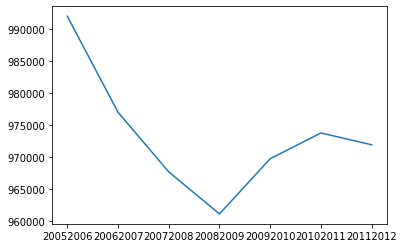

In [76]:
sns.lineplot(x=plt_x, y=plt_y)
plt.show()

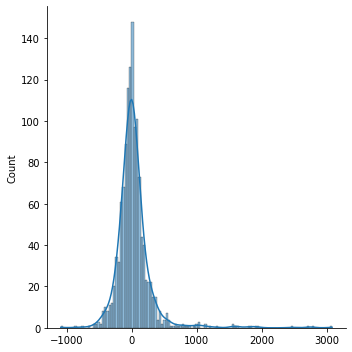

In [80]:
#Displot of change in Enrollment
sns.displot(changeEnroll['20052006']-changeEnroll['20112012'],kde=True)

Change in student Enrollment 2005 to 2011

Insights
1. More than 140 schools have no change in student enrollment
2. Some schools lost upto 1000 students and some gained more than 3000 students 

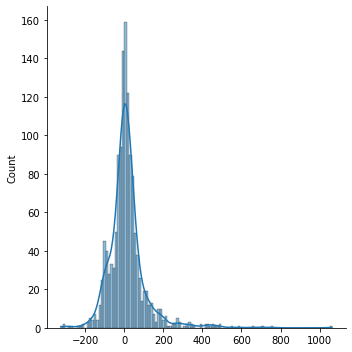

In [89]:
sns.displot(changeEnroll['20052006']-changeEnroll['20062007'],kde=True)

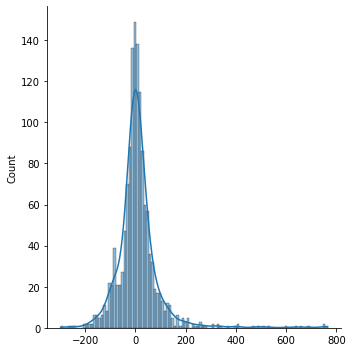

In [90]:
sns.displot(changeEnroll['20062007']-changeEnroll['20072008'],kde=True)

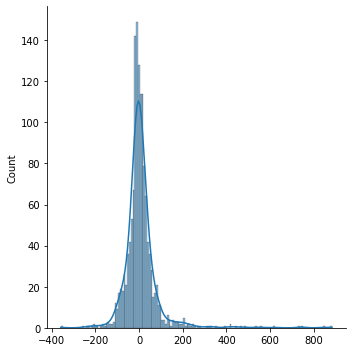

In [94]:
sns.displot(changeEnroll['20072008']-changeEnroll['20082009'],kde=True)

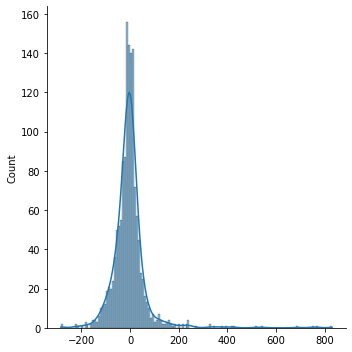

In [95]:
sns.displot(changeEnroll['20082009']-changeEnroll['20092010'],kde=True)

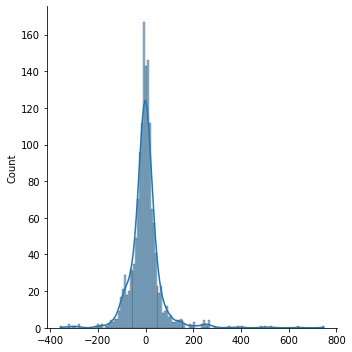

In [92]:
sns.displot(changeEnroll['20092010']-changeEnroll['20102011'],kde=True)

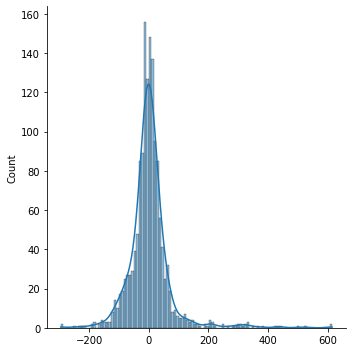

In [93]:
sns.displot(changeEnroll['20102011']-changeEnroll['20112012'],kde=True)

From the displot we can observe that the change in student count in both increasing and decreasing cases was a constant and hence it is linear throughout the 7 years 

<AxesSubplot:xlabel='20052006'>

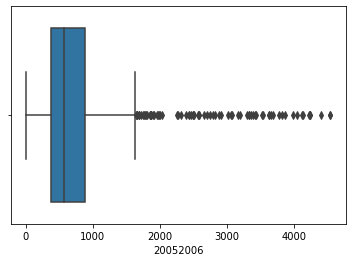

In [83]:
sns.boxplot(x = changeEnroll['20052006'])

<AxesSubplot:xlabel='20062007'>

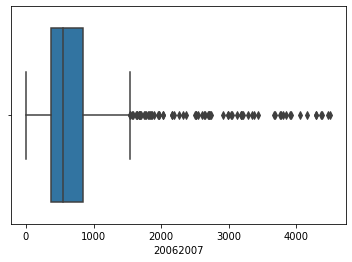

In [84]:
sns.boxplot(x = changeEnroll['20062007'])

<AxesSubplot:xlabel='20082009'>

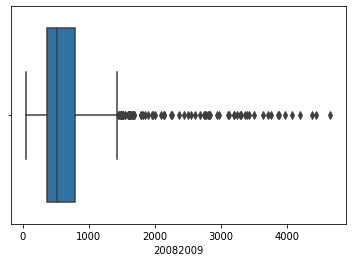

In [85]:
sns.boxplot(x = changeEnroll['20082009'])

<AxesSubplot:xlabel='20102011'>

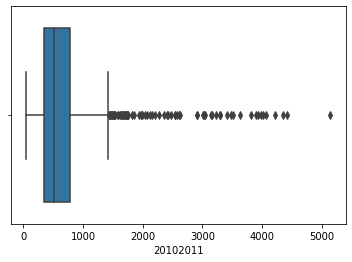

In [87]:
sns.boxplot(x = changeEnroll['20102011'])

<AxesSubplot:xlabel='20112012'>

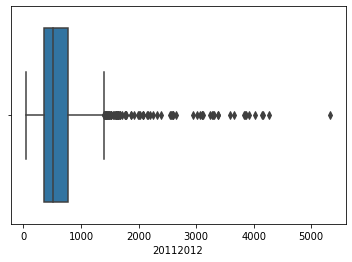

In [88]:
sns.boxplot(x = changeEnroll['20112012'])